**<h1> Mortality Prediction in ICU** 
    
Patients admitted to the ICU suffer from critical illness or injury and are at high risk of dying. ICU mortality rates differ widely depending on the underlying disease process, with death rates as low as 1 in 20 for patients admitted following elective surgery, and as high as 1 in 4 for patients with respiratory diseases. The risk of death can be approximated by evaluating the severity of a patient’s illness as determined by important physiologic, clinical, and demographic determinants.

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd
import math 
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualisations
%matplotlib inline
sns.set_style( 'white' )

#Display all columns
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('mortality_in_icu.csv', encoding = 'utf-8')

**<h2> Exploratory Data Analysis**

Henceforth, we will be doing the exploratory data analysis in order to identify the significant parameters contributing to the mortality rate and neglecting the rest.

In [ ]:
df.head()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH,In-hospital_death
0,77.0,31.0,46.0,54,2.973333,10.500000,0.7,154.0,0.750000,58.795833,...,97.250000,116.891892,37.357143,2.1,0.14,171.052632,10.300000,80.060976,7.387273,0
1,77.0,31.0,46.0,76,2.973333,18.333333,0.7,154.0,1.100000,58.897059,...,96.833333,113.411765,36.939130,2.1,0.14,151.560976,11.266667,80.670588,7.395000,0
2,116.0,83.0,199.5,44,2.500000,4.666667,2.9,154.0,0.333333,67.125000,...,95.000000,125.687500,37.800000,2.1,0.14,124.951219,4.700000,56.700000,7.495000,0
3,105.0,12.0,15.0,68,4.400000,17.666667,0.2,154.0,0.766667,58.795833,...,97.250000,116.891892,36.223077,2.1,0.14,545.833333,9.400000,84.600000,7.387273,0
4,77.0,31.0,46.0,88,3.300000,35.000000,0.7,154.0,1.000000,58.795833,...,97.250000,116.891892,36.880000,2.1,0.14,62.131579,4.300000,80.060976,7.387273,0


In [ ]:
df.columns

Index(['ALP', 'ALT', 'AST', 'Age', 'Albumin', 'BUN', 'Bilirubin',
       'Cholesterol', 'Creatinine', 'DiasABP', 'FiO2', 'GCS', 'Gender',
       'Glucose', 'HCO3', 'HCT', 'HR', 'Height', 'ICUType', 'K', 'Lactate',
       'MAP', 'MechVent', 'Mg', 'NIDiasABP', 'NIMAP', 'NISysABP', 'Na',
       'PaCO2', 'PaO2', 'Platelets', 'RecordID', 'RespRate', 'SaO2', 'SysABP',
       'Temp', 'TroponinI', 'TroponinT', 'Urine', 'WBC', 'Weight', 'pH',
       'In-hospital_death'],
      dtype='object')

In [ ]:
df.shape

(3999, 43)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ALP                3999 non-null   float64
 1   ALT                3999 non-null   float64
 2   AST                3999 non-null   float64
 3   Age                3999 non-null   int64  
 4   Albumin            3999 non-null   float64
 5   BUN                3999 non-null   float64
 6   Bilirubin          3999 non-null   float64
 7   Cholesterol        3999 non-null   float64
 8   Creatinine         3999 non-null   float64
 9   DiasABP            3999 non-null   float64
 10  FiO2               3999 non-null   float64
 11  GCS                3999 non-null   float64
 12  Gender             3999 non-null   int64  
 13  Glucose            3999 non-null   float64
 14  HCO3               3999 non-null   float64
 15  HCT                3999 non-null   float64
 16  HR                 3999 

In [ ]:
df.describe()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH,In-hospital_death
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,...,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,89.259978,91.709903,130.219258,64.247562,2.975942,25.449665,1.216527,152.403601,1.363130,59.262693,...,96.940907,118.145550,36.956291,2.368702,0.337362,133.363074,12.521058,82.799384,7.488870,0.138535
std,70.397850,427.290858,590.482153,17.563142,0.404440,20.586576,2.961385,13.891279,1.406947,9.080069,...,2.296143,16.540816,0.727382,2.418656,1.276145,117.304284,6.466063,23.117431,2.986373,0.345503
min,12.000000,3.000000,6.000000,15.000000,1.100000,2.250000,0.100000,0.000000,0.200000,0.000000,...,38.800000,0.000000,21.644615,0.300000,0.010000,0.000000,0.100000,3.500000,6.311667,0.000000
25%,77.000000,31.000000,46.000000,52.500000,2.973333,13.000000,0.700000,154.000000,0.700000,55.843712,...,97.230769,111.099359,36.614286,2.100000,0.125000,74.044118,8.900000,68.201064,7.364142,0.000000
50%,77.000000,31.000000,46.000000,67.000000,2.973333,19.000000,0.700000,154.000000,0.933333,58.795833,...,97.250000,116.891892,36.968750,2.100000,0.140000,111.032258,11.466667,80.060976,7.387273,0.000000
75%,82.000000,32.250000,49.000000,78.000000,3.000000,30.000000,0.700000,154.000000,1.366667,62.210006,...,97.250000,123.504098,37.364401,2.100000,0.140000,160.419207,14.950000,93.040476,7.407500,0.000000
max,1472.333333,9143.428571,15680.000000,90.000000,5.300000,170.833333,46.366667,330.000000,16.457143,106.666667,...,100.000000,181.725000,39.748980,49.200000,24.040000,3082.380952,137.233333,300.000000,128.532500,1.000000


In [ ]:
df["In-hospital_death"].value_counts()

0    3445
1     554
Name: In-hospital_death, dtype: int64

In [ ]:
df.isna().sum()

ALP                  0
ALT                  0
AST                  0
Age                  0
Albumin              0
BUN                  0
Bilirubin            0
Cholesterol          0
Creatinine           0
DiasABP              0
FiO2                 0
GCS                  0
Gender               0
Glucose              0
HCO3                 0
HCT                  0
HR                   0
Height               0
ICUType              0
K                    0
Lactate              0
MAP                  0
MechVent             0
Mg                   0
NIDiasABP            0
NIMAP                0
NISysABP             0
Na                   0
PaCO2                0
PaO2                 0
Platelets            0
RecordID             0
RespRate             0
SaO2                 0
SysABP               0
Temp                 0
TroponinI            0
TroponinT            0
Urine                0
WBC                  0
Weight               0
pH                   0
In-hospital_death    0
dtype: int6

### Data Visualization

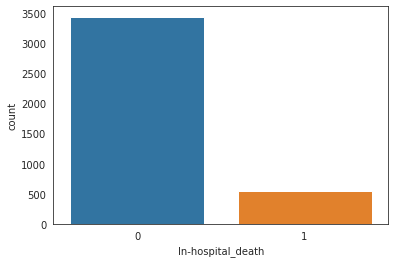

In [ ]:
sns.countplot(x='In-hospital_death',data=df)

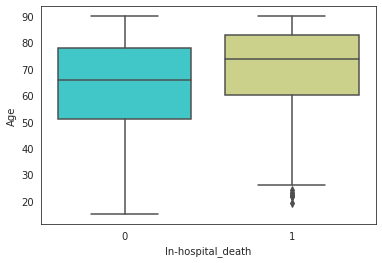

In [ ]:
sns.boxplot(x='In-hospital_death',y='Age',data=df,palette='rainbow')

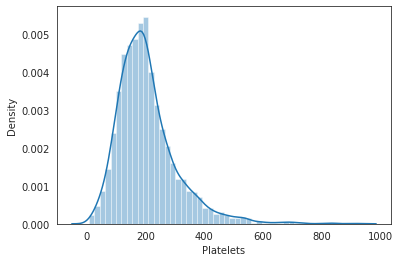

In [ ]:
sns.distplot(df['Platelets'])

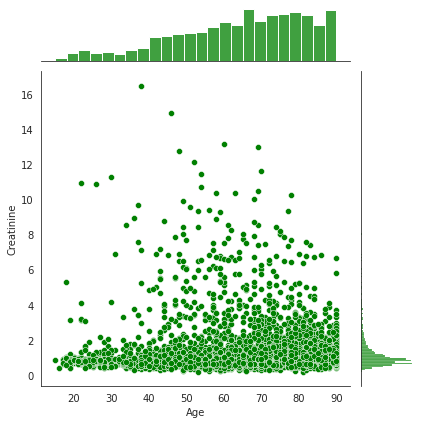

In [ ]:
sns.jointplot(x='Age',y='Creatinine',data=df,kind='scatter',color='green')

<AxesSubplot:xlabel='In-hospital_death', ylabel='WBC'>

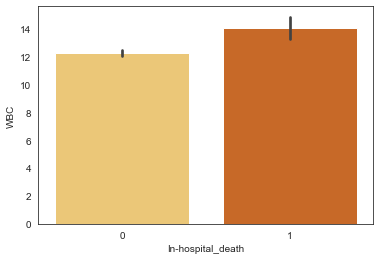

In [ ]:
sns.barplot(x='In-hospital_death',y='WBC',data=df, palette='YlOrBr')

In [ ]:
grouped_df = df.groupby('In-hospital_death').mean()
grouped_df.reset_index(inplace=True)

In [ ]:
grouped_df.head()

,In-hospital_death,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,FiO2,GCS,Gender,Glucose,HCO3,HCT,HR,Height,ICUType,K,Lactate,MAP,MechVent,Mg,NIDiasABP,NIMAP,NISysABP,Na,PaCO2,PaO2,Platelets,RecordID,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,0,85.997575,79.546969,104.534366,63.327141,2.996525,23.605868,1.009897,152.451379,1.296780,59.446573,123.239335,11.94493,40.930914,135.394062,23.891645,31.442080,86.693546,170.018984,41.525109,4.132546,2.056289,80.552502,1.0,2.010040,57.561699,76.459842,117.431816,138.825634,40.468013,187.404835,205.816884,137618.905951,19.197580,96.992952,118.461827,36.973649,2.317174,0.319521,139.048691,12.274920,83.304026,7.458981
1,1,109.546941,167.344035,289.938487,69.971119,2.847949,36.915153,2.501438,152.106498,1.775725,58.119250,0.555460,9.56529,0.543321,147.619859,22.324446,31.316955,89.791570,169.485199,2.909747,4.160840,2.700424,79.809959,1.0,2.064468,55.017554,73.874794,114.643028,139.083480,38.934523,136.296453,199.831120,137521.043321,19.388056,96.617266,116.178809,36.848346,2.689125,0.448301,98.007568,14.051643,79.661311,7.674730


In [ ]:
data = grouped_df[['ALP', 'ALT', 'Age', 'DiasABP', 'FiO2', 'Glucose', 'Platelets', 'Urine', 'WBC']]

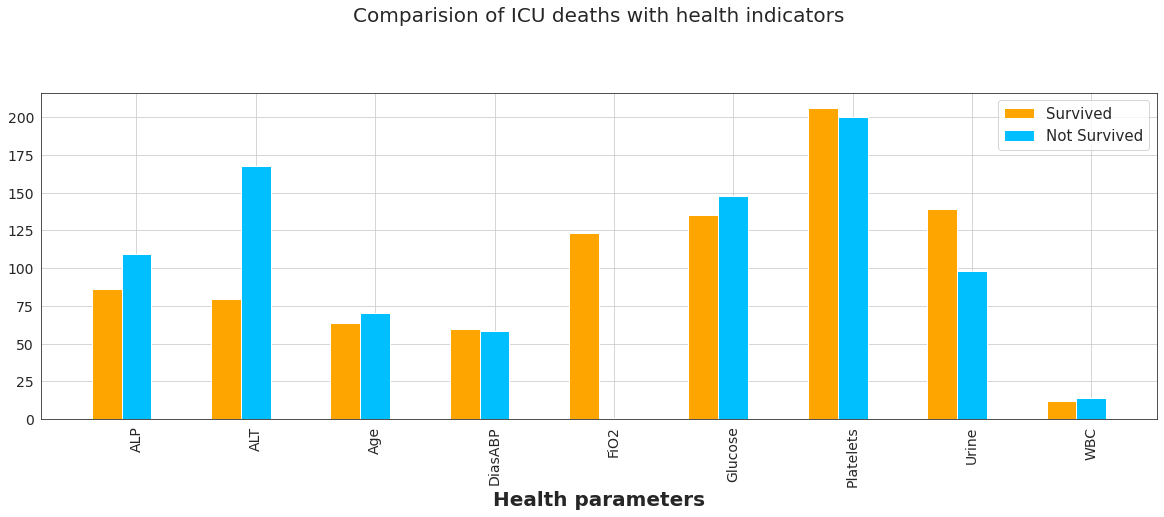

In [ ]:
barWidth = 0.25
labels=['ALP', 'ALT', 'Age', 'DiasABP', 'FiO2', 'Glucose', 'Platelets', 'Urine', 'WBC']
legend = ['Survived','Not Survived']

X = labels
Y1 = data.iloc[0]
Y2 = data.iloc[1]


r1 = np.arange(len(Y1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, Y1, color='orange', width=0.25, edgecolor='white', label='var1')
plt.bar(r2, Y2, color='deepskyblue', width=0.25, edgecolor='white', label='var2')
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(labels))], X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
plt.xlabel('Health parameters', fontsize=20)
plt.grid()
plt.title('Comparision of ICU deaths with health indicators', y=1.20, fontsize='20')
plt.legend(legend,loc='upper right', bbox_to_anchor=(1.0,1.0), fontsize=15)
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14

plt.show()

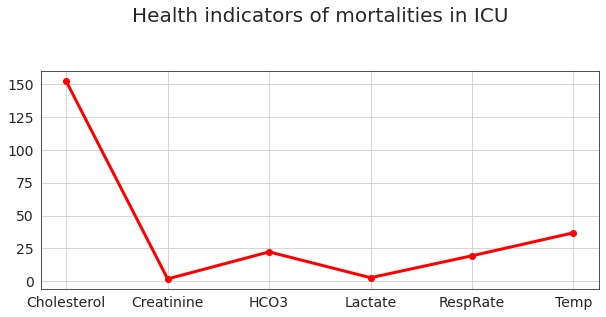

In [ ]:
data = grouped_df[['Cholesterol','Creatinine','HCO3','Lactate','RespRate','Temp']]
X = ['Cholesterol','Creatinine','HCO3','Lactate','RespRate','Temp']
Y1 = data.iloc[1]

lines=plt.plot(X, Y1, linewidth='3.0', color='red', marker='o', markersize='6')
plt.title('Health indicators of mortalities in ICU', y=1.20, fontsize='20')
plt.rcParams['figure.figsize']=(10,4)
plt.rcParams['font.size'] = 14
plt.grid()
plt.show()

**<h3>Using Correlation heatmap to find important features and their relations with other features.**

<AxesSubplot:>

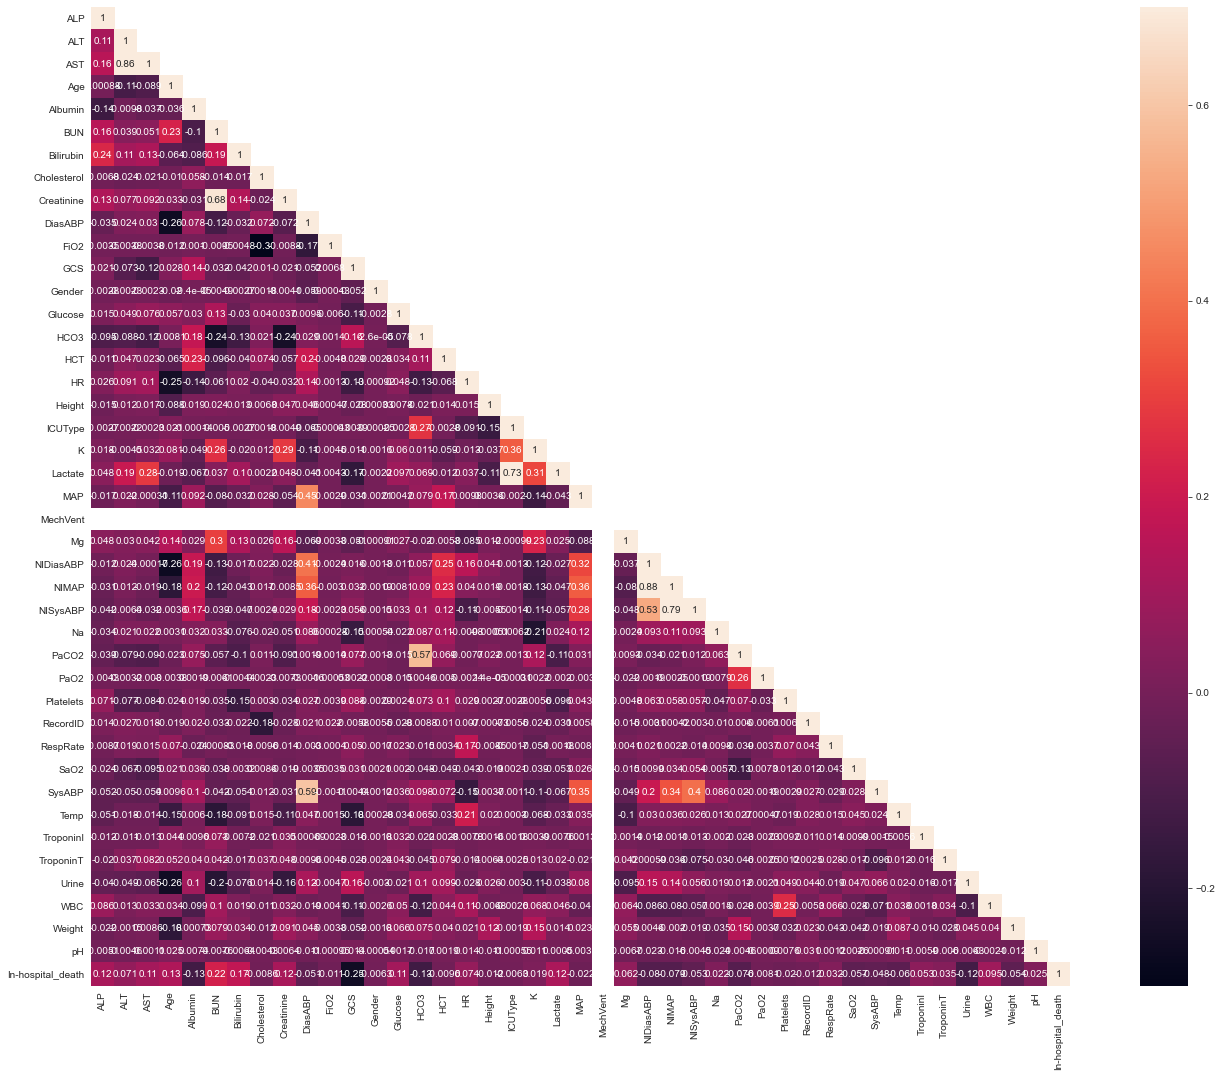

In [ ]:
correlation_map = df[df.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(25,18)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

In [ ]:
new_df = df.drop(['In-hospital_death'] , axis =1)
new_df.shape

(3999, 42)

In [ ]:
new_df = new_df.drop(['Gender','Cholesterol','HCT','ICUType','Height','MechVent','RecordID'] , axis =1)

**<h3> Scaling Data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
new_df = scaler.fit_transform(new_df)


Dataframe df will be given as X parameter and Inhospitaldeath case will be given as Y.

In [ ]:
X = new_df
y = df['In-hospital_death']

In [ ]:
print(X.shape , y.shape)

(3999, 35) (3999,)


**<h3>Splitting Dataset**

In [ ]:
X_train , X_test , y_train , y_test  = train_test_split(X , y , test_size = 0.2)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3199, 35) (800, 35) (3199,) (800,)


**<h1>Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=600)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [ ]:
predictions = rfc.predict(X_test)

**<h2>Predictions and evaluations of random forest**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       678
           1       0.86      0.15      0.25       122

    accuracy                           0.87       800
   macro avg       0.86      0.57      0.59       800
weighted avg       0.87      0.87      0.82       800



In [ ]:
print(accuracy_score(y_test,predictions))

0.86625


In [ ]:
y_test.value_counts()

0    678
1    122
Name: In-hospital_death, dtype: int64

In [ ]:
print(confusion_matrix(y_test,predictions))

[[675   3]
 [104  18]]


## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

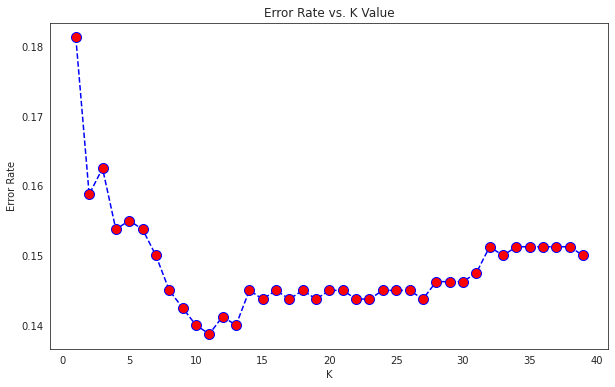

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       678
           1       0.92      0.09      0.16       122

    accuracy                           0.86       800
   macro avg       0.89      0.54      0.54       800
weighted avg       0.87      0.86      0.81       800



In [ ]:
print(accuracy_score(y_test,pred))

0.86


In [ ]:
print(confusion_matrix(y_test,pred))

[[677   1]
 [111  11]]


**<h2> Summary**

The above model has a loss of 0.27 and an accuracy of about 88%. This is the maximum accuracy it can reach with the given size of data. 

This model can be successfully used for predicting mortality in ICUs but then one should keep in mind that these values are just predicted values and the predictions can be wrong.